In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.columns=df.columns.str.strip()

In [3]:
bdf=df[0:122]
sdf=df[124:len(df)]

In [4]:
bdf['Region']=1
sdf['Region']=2

In [5]:
df=pd.concat([bdf,sdf])

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [7]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [8]:
for i in list(df['DC']):
    if i=='14.6 9':
        df['DC'].replace(to_replace=i,value=14.6,inplace=True)
df['DC']=df['DC'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    float64
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 30.5+ KB


In [10]:
for i in list(df['FWI']):
    if i=='fire   ':
        df['FWI'].replace(to_replace=i,value=0.5,inplace=True)
df['FWI']=df['FWI'].astype(float)    

In [11]:
df['Classes']=df['Classes'].str.strip()

In [12]:
for i in df['Classes']:
    if i=='not fire':
        df['Classes'].replace(to_replace='not fire',value=0,inplace=True)
    elif i=='fire':
        df['Classes'].replace(to_replace='fire',value=1,inplace=True)
        

In [13]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,0.0,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1.0,2
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,2
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,2


#### DATA IS CLEANED

In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [15]:
df['Classes'].fillna(value=stats.mode(df['Classes'])[0][0],inplace=True)

In [103]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## INSIGHT OR OSERVATION
#### NO MISSING VALUES

In [104]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


## INSIGHT OR OSERVATION
#### NO DUPLICATE VALUES

In [105]:
df[['Rain',	'FFMC'	,'DMC','DC',	'ISI'	,'BUI'	,'FWI']]=df[['Rain',	'FFMC'	,'DMC','DC',	'ISI'	,'BUI'	,'FWI']].astype(float)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    float64
 14  Region       244 non-null    int64  
dtypes: float64(8), int64(7)
memory usage: 30.5 KB


In [107]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.008607,0.565574,1.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.437020,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,1.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [108]:
df1 = df.drop(['day','month','year'], axis=1)

In [109]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

In [110]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,2
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,2
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,2


In [111]:
bdf=df[df['Region']==1]
sdf=df[df['Region']==2]
df.drop('year',axis=1,inplace=True)

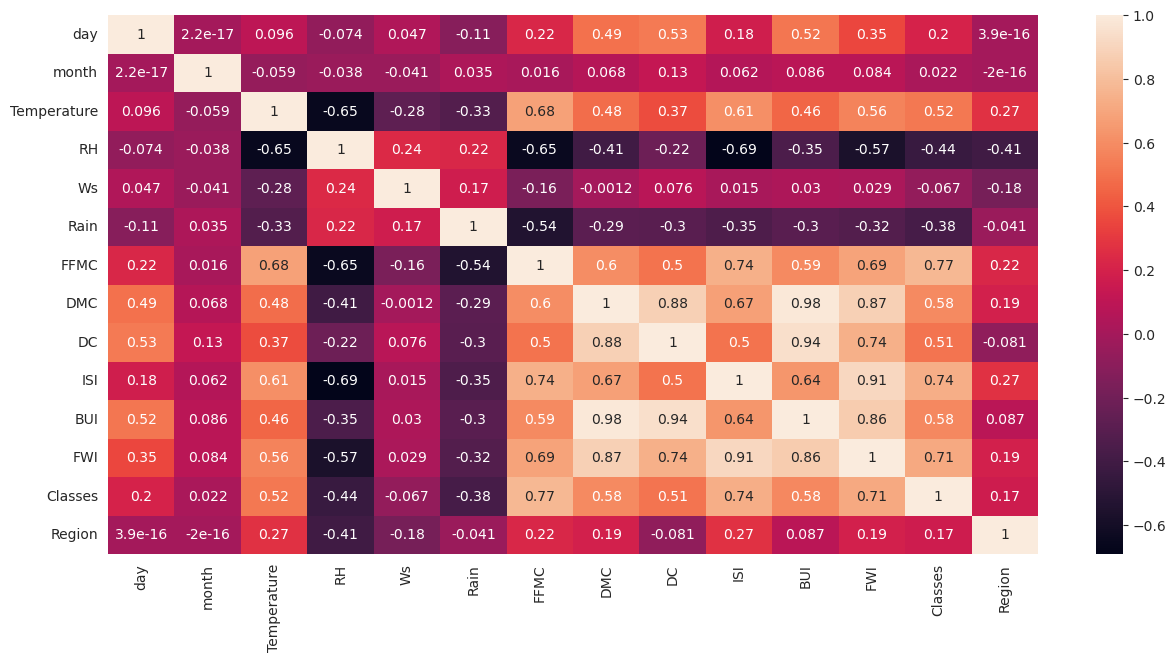

In [112]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

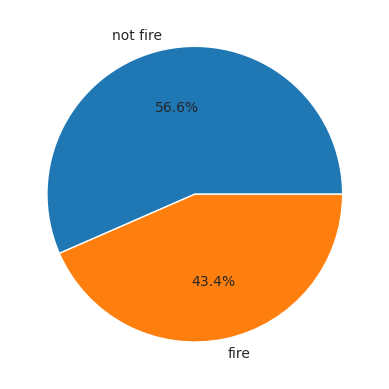

In [113]:
per=df1['Classes'].value_counts().tolist()
def perc(l):
    a=sum(l)
    perc=[]
    for i in l:
        perc.append((i/a)*100)
    return perc
perc=perc(per)
perc
Classes=['not fire','fire']
plt.pie(labels=Classes,x=perc,autopct='%1.1f%%')
plt.show()

In [114]:
df.groupby('Classes')['Region'].sum()

Classes
0.0    149
1.0    217
Name: Region, dtype: int64

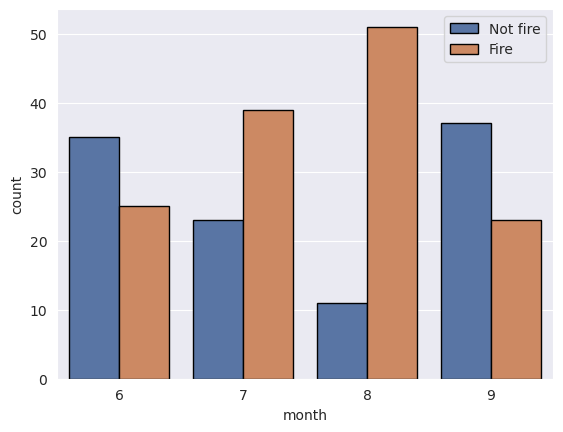

In [115]:
sns.countplot(data=df,x='month',hue='Classes',ec='black',palette='deep');
plt.legend(['Not fire','Fire']);

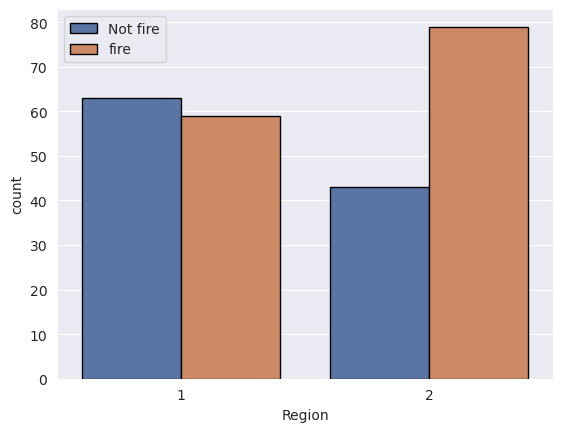

In [116]:
sns.countplot(data=df,x='Region',hue='Classes',ec='black',palette='deep');
plt.legend(['Not fire','fire']);


## INSIGHT OR OBSERVATION
#### Sidi Bel-Abbes region has got more fire whereas less in case of Bejaia region

#### *Monthly fire analysis*

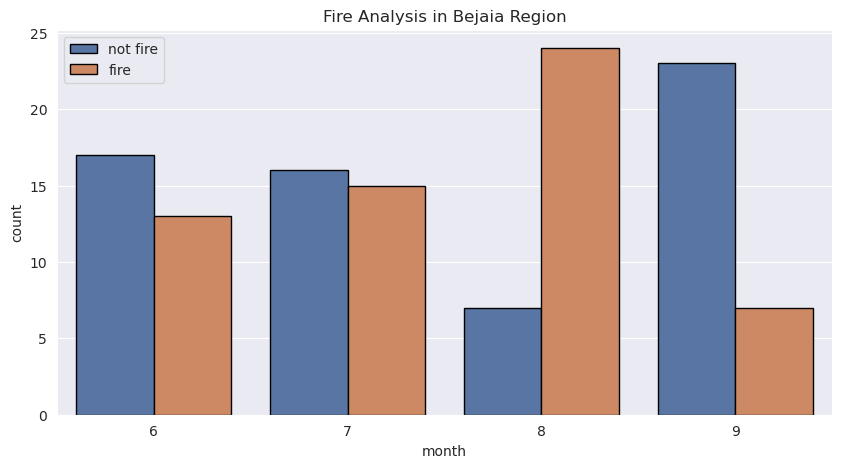

In [117]:
label=['June','July','August','September']
plt.figure(figsize=(10,5))
sns.countplot(data=bdf,x='month',hue='Classes',ec='black',palette='deep')
plt.legend(['not fire','fire']);
plt.title('Fire Analysis in Bejaia Region');

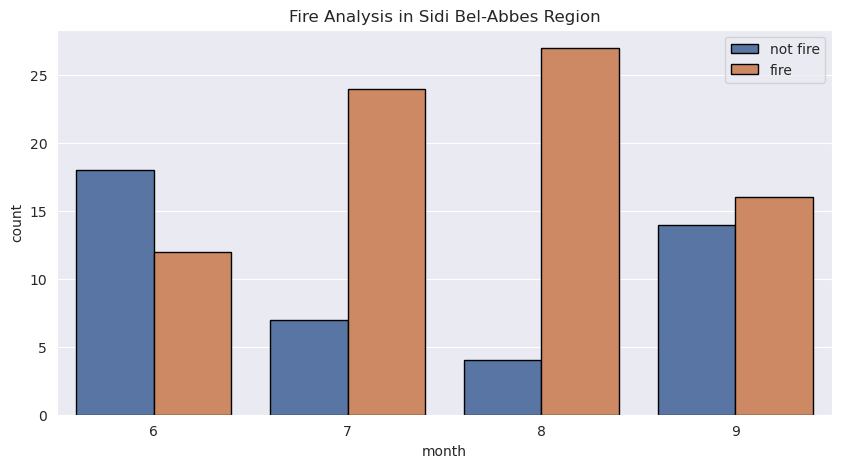

In [118]:
plt.figure(figsize=(10,5))
sns.countplot(data=sdf,x='month',hue='Classes',ec='black',palette='deep')
plt.legend(['not fire','fire']);
plt.title('Fire Analysis in Sidi Bel-Abbes Region');


## INSIGHT OR OBSERVATION
#### Most of the fire takes place in August in both region.
#### June has the least fire for Sidi Bel-Abbes region and September for Bejaia region.
#### July has got a huge amount of fire for Sidi Bel-Abbes region and also decent fire for Bejaia region.

In [119]:
def plots(factor):
    sns.set_style('darkgrid')
    plt.figure(figsize=(14,7))
    plt.title('The fire count wrt '+str(factor));
    plt.xlabel(str(factor));
    plt.ylabel('fire_counts');
    sns.histplot(data=df,x=str(factor),hue='Classes',ec='black',palette='deep')
    plt.legend(labels=['Fire','Not Fire'])

27.0 37.0
41.75 84.25
12.0 18.0
0 0.5


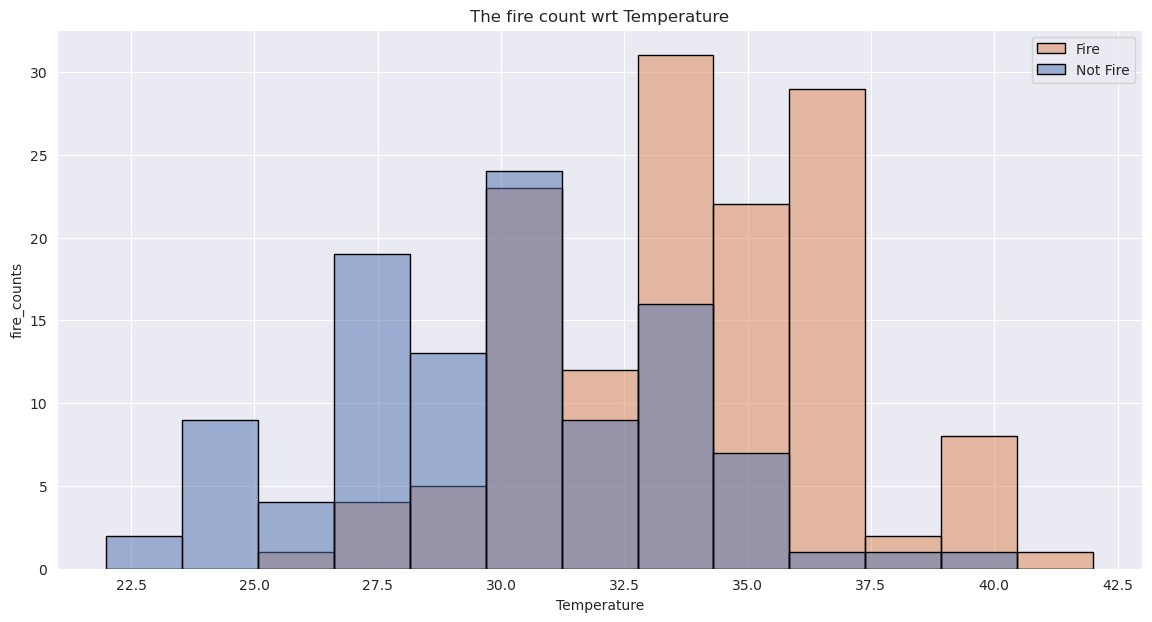

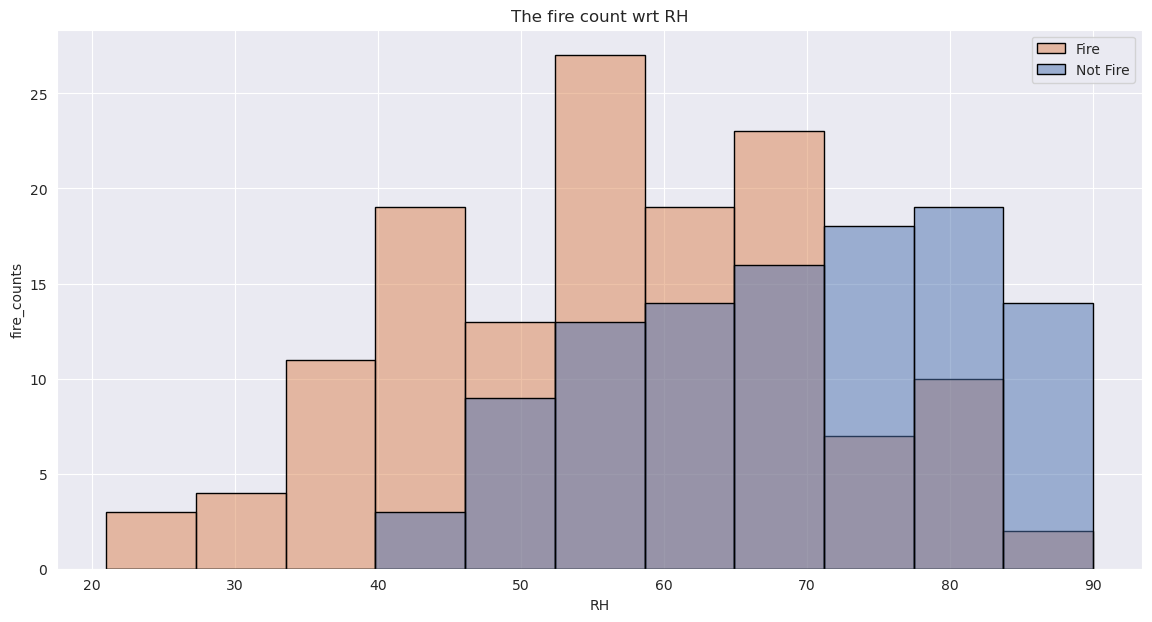

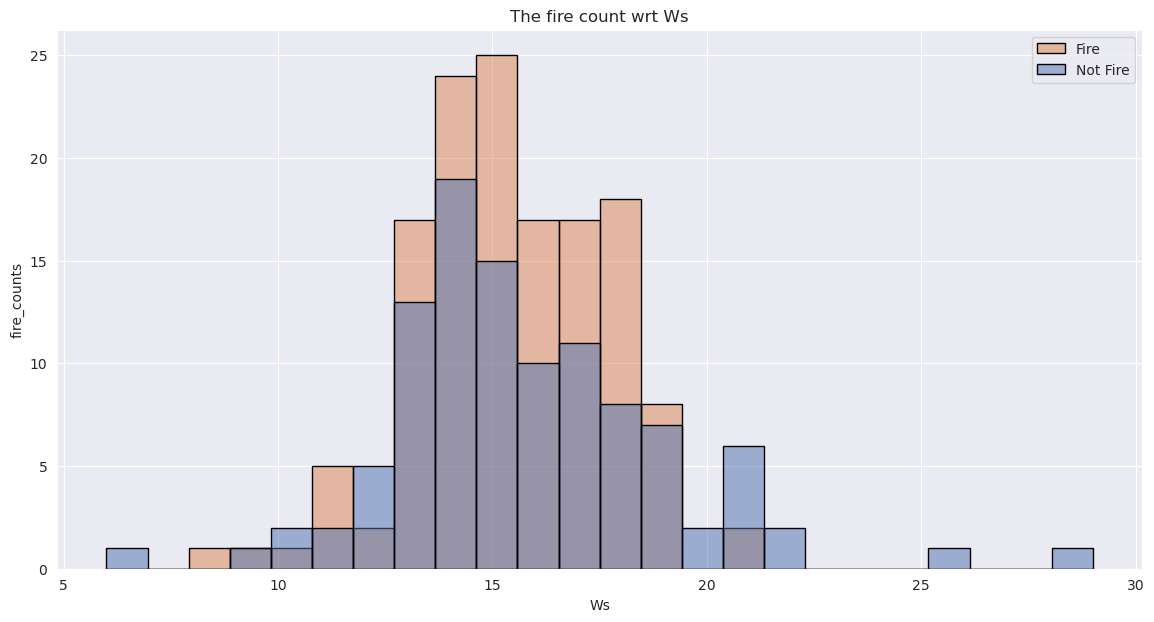

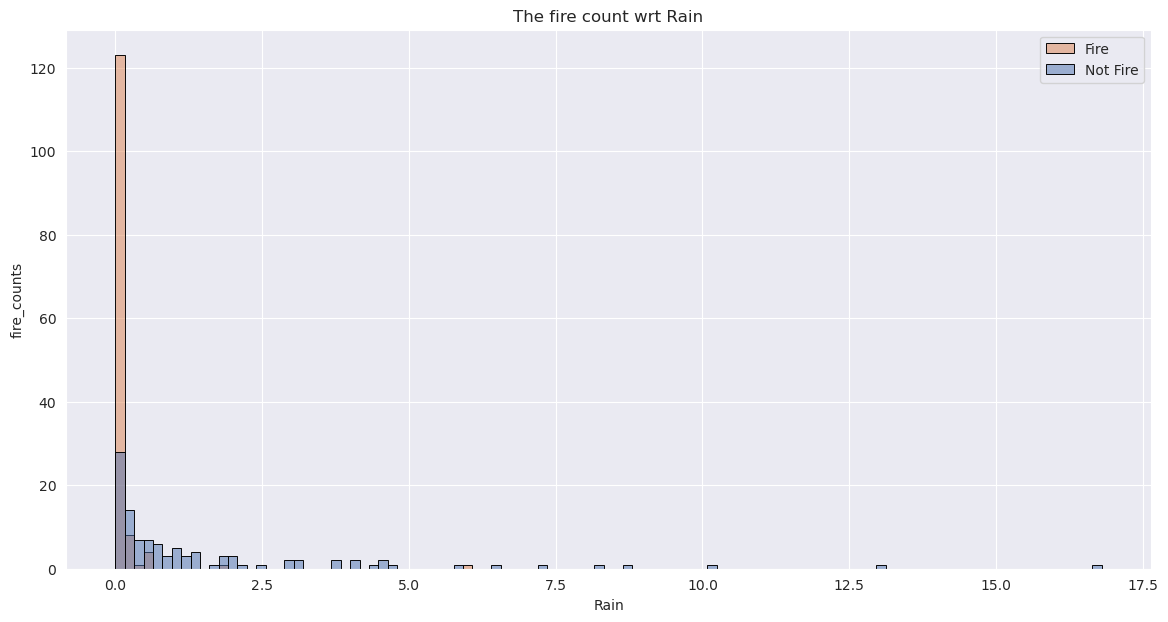

In [120]:
for i in df[['Temperature','RH','Ws','Rain']]:
    a,b=np.percentile(df[i],[25,75])
    r=b-a
    m=np.median(df[i])
    x,y=m-r,m+r
    if x<0:
        x=0
    print(x,y)
    plots(i)

## INSIGHT OR OBSERVATION
#### The max. fire occured at *Temperature between 27°C-37°C*.
#### The max. fire occured when *Relative Humidity between 42%-84%*.
#### The max. fire occured when *Wind Speed between 12kmph-18kmph*.
#### The max. fire occured when *Rain less than 0.5mm*


In [121]:
def plots(factor):
    plt.figure(figsize=(10,5))
    plt.title('The fire count wrt '+str(factor));
    plt.xlabel(str(factor));
    plt.ylabel('fire_counts');
    sns.histplot(data=df,x=factor,hue='Classes',ec='black',palette='deep')
    plt.legend(labels=['Fire','Not Fire']);

28.6 96.0
83.5
0.7 65.9
11.3
6.9 220.4
33.1
0.0 19.0
3.5
1.1 68.0
12.25
0.0 31.1
4.2


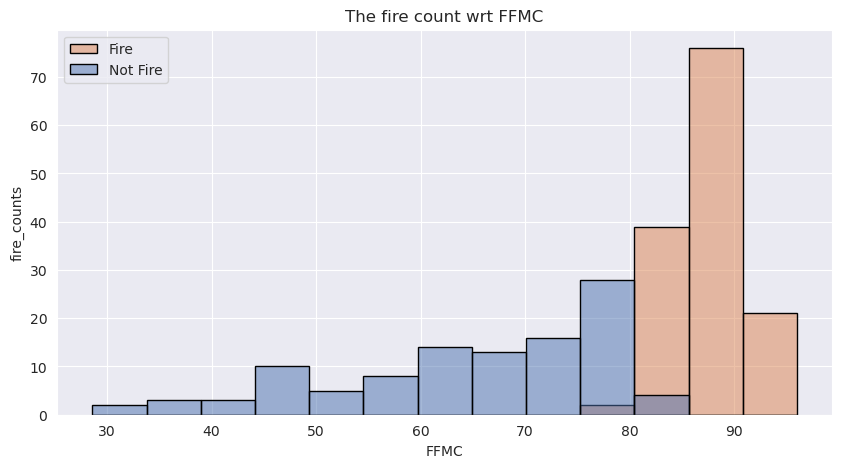

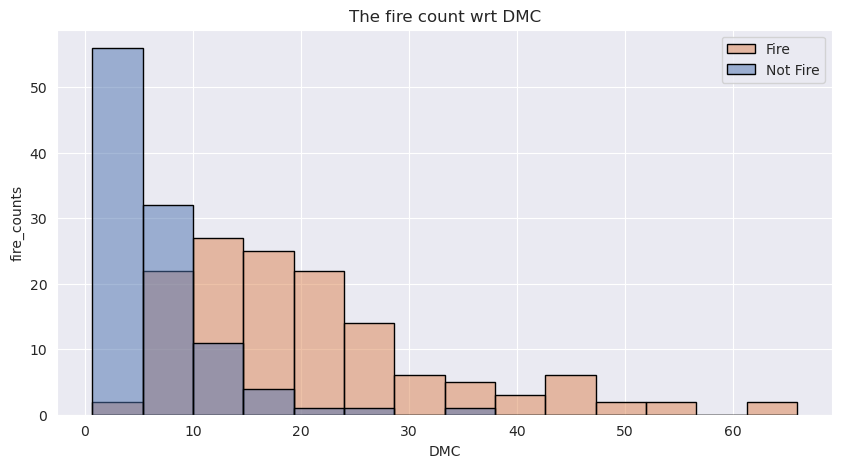

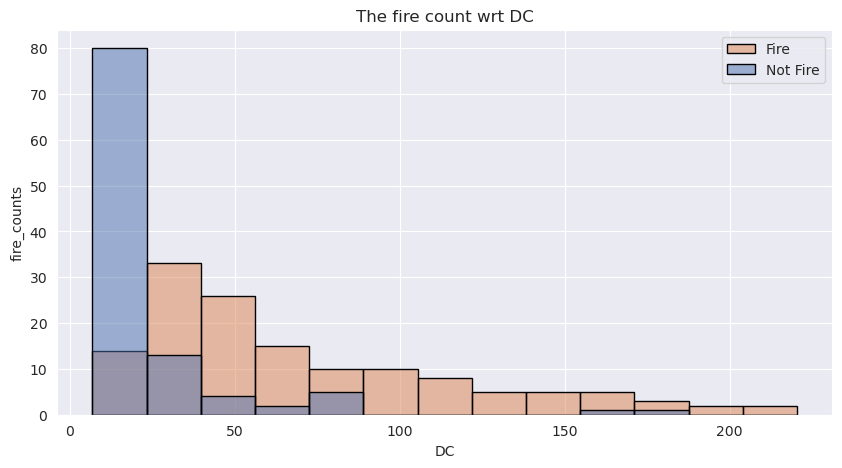

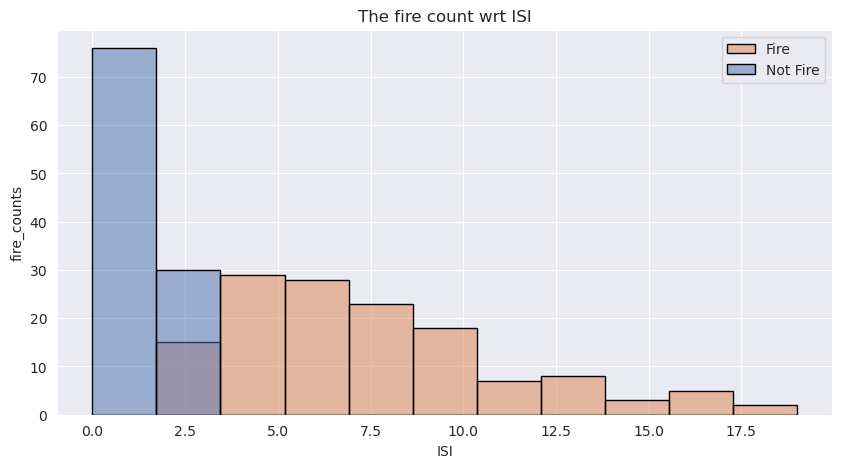

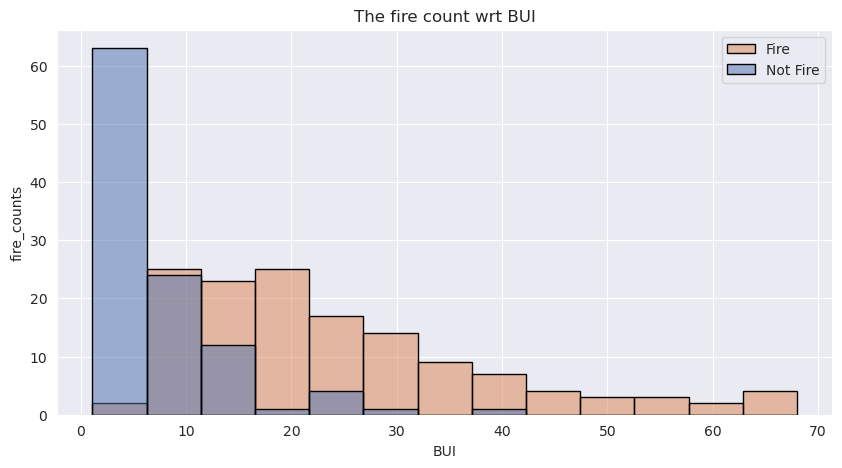

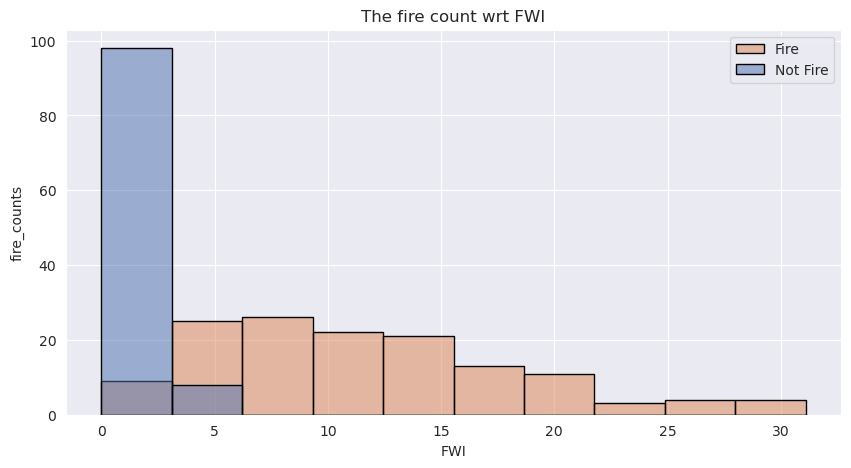

In [122]:
for i in df[['FFMC',	'DMC'	,'DC'	,'ISI'	,'BUI'	,'FWI']]:
    print(df[i].min(),df[i].max())
    print(np.median(df[i]))
    plots(i)

## INSIGHT OR OBSERVATION
#### The max. fire occured at *Temperature between 27°C-37°C*.
#### The max. fire occured when *Relative Humidity between 42%-84%*.
#### The max. fire occured when *Wind Speed between 12kmph-18kmph*.
#### The max. fire occured when *Rain less than 0.5mm*


In [123]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,2
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,2
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,2
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,2
